In [154]:
import numpy as np 
import torch 
import torch.nn.functional as F
import matplotlib.pyplot as plt 
from mpl_toolkits.axes_grid1 import make_axes_locatable

def make_nim(filter_summaries, num_filters, max_size=None, sorted=True, zero_padding=True, interpolate=True):
    assert zero_padding or interpolate, "one of them must be true to make sure the same size"
    upsampled_filter_summaries = [] 
    for f in filter_summaries:
        assert isinstance(f, torch.Tensor) and f.ndim == 1 
        if zero_padding: # zero padding to match the maximum size
            zero_padding_max_size = max(num_filters)
            f = torch.cat([f, torch.zeros(zero_padding_max_size - f.size(0))])
        if interpolate: # interpolate to the max size
            if max_size is None:
                max_size = max(num_filters)
            f = F.interpolate((f.view(1,1,1,-1)), (max_size), mode="bilinear")[0,0,0,:]    
        upsampled_filter_summaries.append(f)
    stacked = torch.stack(upsampled_filter_summaries).cpu().detach().numpy()
    if sorted:
        final = np.sort(stacked, axis=-1)
    else:
        final = stacked
    return final

def plot(nim, figsize, name):
    fig, ax = plt.subplots(figsize=figsize)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='7%', pad="5%")
    im = ax.imshow(nim, cmap="jet")
    cb = fig.colorbar(im, cax=cax, orientation='vertical')
    ax.set_title(name)

Filter  0 : torch.Size([118])
Filter  1 : torch.Size([99])
Filter  2 : torch.Size([219])
Filter  3 : torch.Size([193])
Filter  4 : torch.Size([187])
Filter  5 : torch.Size([236])
Filter  6 : torch.Size([118])
Filter  7 : torch.Size([219])
Filter  8 : torch.Size([83])
Filter  9 : torch.Size([167])


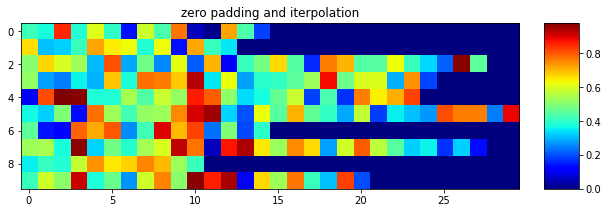

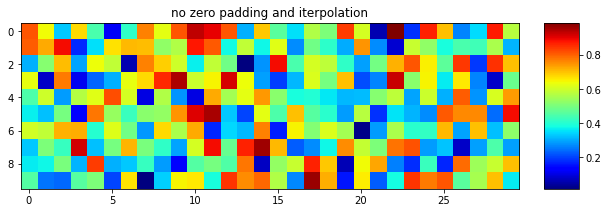

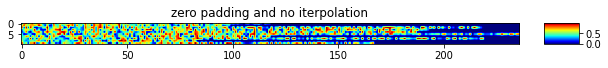

In [155]:
num_layers = 10
num_filters = [np.random.randint(64, 256) for i in range(num_layers)]
filter_summaries = [torch.rand(n_f) for n_f in num_filters]
max_size = 30

for i, f in enumerate(filter_summaries):
    print("Filter {0:2d} :".format(i), f.size())

# Zero Padding and Interpolation 
nim = make_nim(filter_summaries, num_filters, max_size=max_size, interpolate=True, zero_padding=True, sorted=False)
plot(nim, figsize=(10,10), name="zero padding and iterpolation")

# No Zero Padding and Interpolation 
nim = make_nim(filter_summaries, num_filters, max_size=max_size, interpolate=True, zero_padding=False, sorted=False)
plot(nim, figsize=(10,10), name="no zero padding and iterpolation")

# Zero Padding and No Interpolation 
nim = make_nim(filter_summaries, num_filters, max_size=max_size, interpolate=False, zero_padding=True, sorted=False)
plot(nim, figsize=(10,10), name="zero padding and no iterpolation")